# Package: Chronos


<img src="https://raw.githubusercontent.com/amazon-science/chronos-forecasting/main/figures/chronos-logo.png" alt="GluonTS" style="width: 30%; margin-right: 20px; border-radius: 10px;">

## First Example

In [1]:
import pandas as pd  # requires: pip install pandas
import torch
from chronos import BaseChronosPipeline


/Users/cls/miniforge3/envs/dslp-tsf/lib/python3.12/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/cls/miniforge3/envs/dslp-tsf/lib/python3.12/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <367D4265-B20F-34BD-94EB-4F3EE47C385B> /Users/cls/miniforge3/envs/dslp-tsf/lib/python3.12/site-packages/torchvision/image.so
  Reason: tried: '/Users/cls/miniforge3/envs/dslp-tsf/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/cls/miniforge3/envs/dslp-tsf/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/cls/miniforge3/envs/dslp-tsf/lib/python3.12/lib-dynload/../../libjpeg.9.dylib' (no such file), '/Users/cls/miniforge3/envs/dslp-tsf/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be

In [6]:

pipeline = BaseChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",  # use "amazon/chronos-bolt-small" for the corresponding Chronos-Bolt model
    device_map="cpu",  
    torch_dtype=torch.bfloat16,
)


In [3]:

df = pd.read_csv(
    "https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv"
)
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:

# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
# quantiles is an fp32 tensor with shape [batch_size, prediction_length, num_quantile_levels]
# mean is an fp32 tensor with shape [batch_size, prediction_length]
quantiles, mean = pipeline.predict_quantiles(
    context=torch.tensor(df["#Passengers"]),
    prediction_length=12,
    quantile_levels=[0.1, 0.5, 0.9],
)

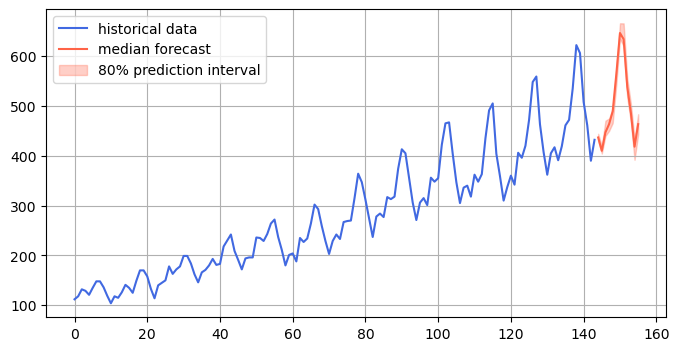

In [5]:
import matplotlib.pyplot as plt  # requires: pip install matplotlib

forecast_index = range(len(df), len(df) + 12)
low, median, high = quantiles[0, :, 0], quantiles[0, :, 1], quantiles[0, :, 2]

plt.figure(figsize=(8, 4))
plt.plot(df["#Passengers"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()

---
_This notebook is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/). Copyright © 2018-2024 [Point 8 GmbH](https://point-8.de)_